In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import folium


In [2]:
df = pd.read_csv('dataset_space_API_past_launches_raw.csv')

In [8]:
Date_count = df['Date'].value_counts().to_frame()
BoosterVersion_count = df['BoosterVersion'].value_counts().to_frame()
PayloadMass_count = df['PayloadMass'].value_counts().to_frame()
Orbit_count = df['Orbit'].value_counts().to_frame()
LaunchSite_count = df['LaunchSite'].value_counts().to_frame()
Outcome_count = df['Outcome'].value_counts().to_frame()
Flights_count = df['Flights'].value_counts().to_frame()
GridFins_count = df['GridFins'].value_counts().to_frame()
Reused_count = df['Reused'].value_counts().to_frame()
Legs_count = df['Legs'].value_counts().to_frame()
LandingPad_count = df['LandingPad'].value_counts().to_frame()
Block_count = df['Block'].value_counts().to_frame()
ReusedCount_count = df['ReusedCount'].value_counts().to_frame()
Serial_count = df['Serial'].value_counts().to_frame()
Longitude_count = df['Longitude'].value_counts().to_frame()
Latitude_count = df['Latitude'].value_counts().to_frame()

In [9]:
df_droped = df.dropna()
df_droped = df_droped.reset_index(drop=True)
df_droped.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,False ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


In [10]:
# encode the Outcome column
df_label = df_droped.replace(['True Ocean','True RTLS', 'True ASDS', 
                         'False Ocean', 'False RTLS', 'False ASDS', 'None ASDS','None None',
                         'True','False'],
                        [1,1,1,
                         0,0,0,0,0,
                         1,0])

In [11]:
df_label.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,1,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,0,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


In [12]:
LaunchSite_count

,LaunchSite
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13
Kwajalein Atoll,4


### Success Rate in CCSFS SLC 40

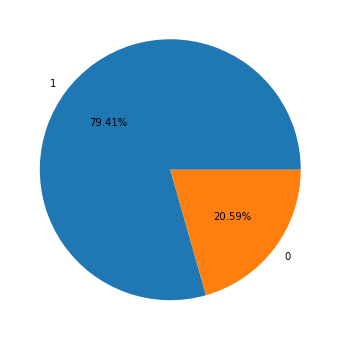

In [13]:
CCSFS = df_label.loc[df_label['LaunchSite']=='CCSFS SLC 40']
Outcome_CCSFS = CCSFS['Outcome'].value_counts().to_frame()

plt.figure(figsize = (6,6))
plt.pie(Outcome_CCSFS['Outcome'], 
        labels = list(Outcome_CCSFS.index), 
        autopct = '%.2f%%' )
plt.show()

### Success Rate in KSC LC 39A

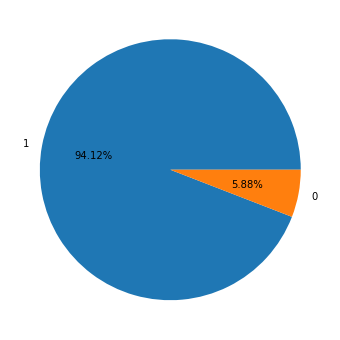

In [14]:
KSC = df_label.loc[df_label['LaunchSite']=='KSC LC 39A']
Outcome_KSC = KSC['Outcome'].value_counts().to_frame()

plt.figure(figsize = (6,6))
plt.pie(Outcome_KSC['Outcome'], 
        labels = list(Outcome_KSC.index), 
        autopct = '%.2f%%' )
plt.show()

### Success Rate in VAFB SLC 4E

([<matplotlib.patches.Wedge at 0x7fe093ebb5e0>,
 [Text(-1.0461621424642782, 0.33991877217145816, '1'),
  Text(1.0461621185951564, -0.3399188456330337, '0')],
 [Text(-0.5706338958896062, 0.18541023936624987, '90.00%'),
  Text(0.5706338828700852, -0.18541027943620017, '10.00%')])

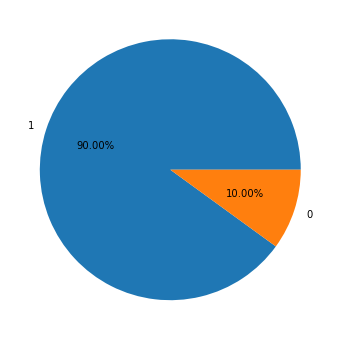

In [15]:
VAFB = df_label.loc[df_label['LaunchSite']=='VAFB SLC 4E']
Outcome_VAFB = VAFB['Outcome'].value_counts().to_frame()

plt.figure(figsize = (6,6))
plt.pie(Outcome_VAFB['Outcome'], 
        labels = list(Outcome_VAFB.index), 
        autopct = '%.2f%%' )
# plt.show()



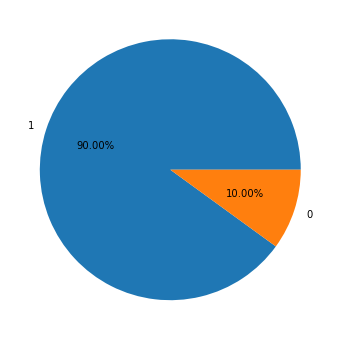

In [16]:
import base64
from io import BytesIO

fig = plt.figure(figsize = (6,6))
plt.pie(Outcome_VAFB['Outcome'], 
        labels = list(Outcome_VAFB.index), 
        autopct = '%.2f%%' )
# plt.show()

tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'


# with open('test.html','w') as f:
#     f.write(html)

In [17]:
m = folium.Map(location=[28.608058, -80.603956], zoom_start=15, titles='')

folium.Marker(
    location=[28.561857, -80.577366],
    popup="CCSFS SLC 40",
    icon=folium.Icon(color='red', icon='fa-rocket', prefix='fa'),
).add_to(m)

folium.Marker(
    location=[28.608058, -80.603956],
    popup="KSC LC 39A",
    icon=folium.Icon(color='green', icon='fa-rocket', prefix='fa'),
).add_to(m)

folium.Marker(
    location=[34.632093, -120.610829],
    popup="VAFB SLC 4E",
    icon=folium.Icon(color='blue', icon='fa-rocket', prefix='fa'),
).add_to(m)

m

In [18]:
m = folium.Map(location=[34.632093, -120.610829], zoom_start=15, tiles="Stamen Terrain",)


folium.Circle(
    radius=100,
    location=[28.561857, -80.577366],
    color="crimson",
    fill=True
).add_to(m)

folium.Circle(
    radius=100,
    location=[28.608058, -80.603956],
    color="crimson",
    fill=True
).add_to(m)

folium.Circle(
    radius=500,
    location=[34.632093, -120.610829],
    color="crimson",
    fill=True
).add_to(m)

folium.Circle(
    radius=100,
    location=[9.047721, 167.743129],
    color="crimson",
    fill=True
).add_to(m)

m